In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

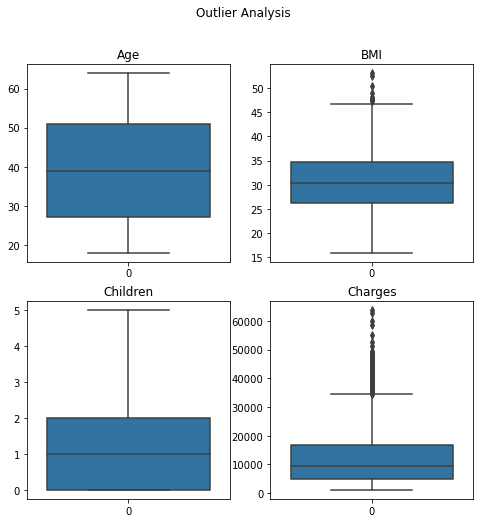

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

fig.suptitle('Outlier Analysis')
sns.boxplot(ax=axes[0, 0], data=df['age'])
axes[0, 0].set_title('Age')
sns.boxplot(ax=axes[0, 1], data=df['bmi'])
axes[0, 1].set_title('BMI')
sns.boxplot(ax=axes[1, 0], data=df['children'])
axes[1, 0].set_title('Children')
sns.boxplot(ax=axes[1, 1], data=df['charges'])
axes[1, 1].set_title('Charges')

plt.show()

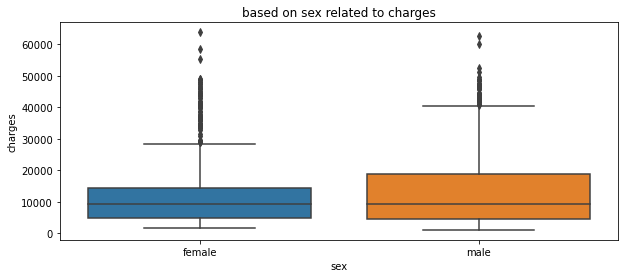

In [17]:
plt.figure(figsize=(10,4))
plt.title('based on sex related to charges')
sns.boxplot(x='sex',y='charges',data=df)
plt.show()

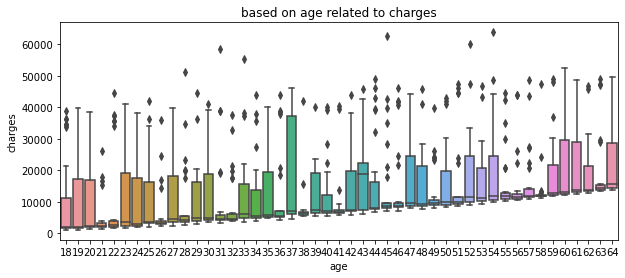

In [19]:
plt.figure(figsize=(10,4))
plt.title('based on age related to charges')
sns.boxplot(x='age',y='charges',data=df)
plt.show()

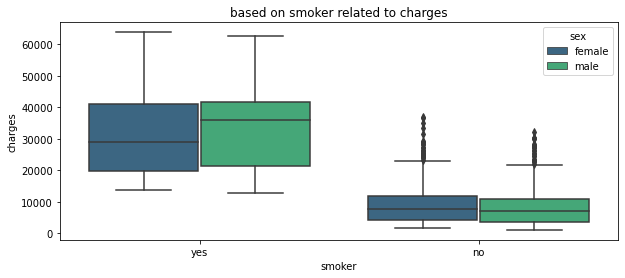

In [21]:
plt.figure(figsize=(10,4))
plt.title('based on smoker related to charges')
sns.boxplot(x='smoker',y='charges',hue='sex',palette='viridis',data=df)
plt.show()

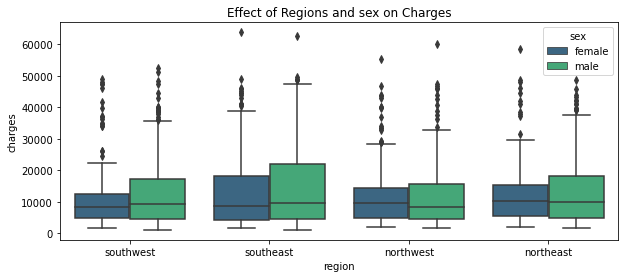

In [22]:
plt.figure(figsize=(10,4))
plt.title('Effect of Regions and sex on Charges')
sns.boxplot(x='region',y='charges',data=df,hue='sex',palette='viridis')
plt.show()

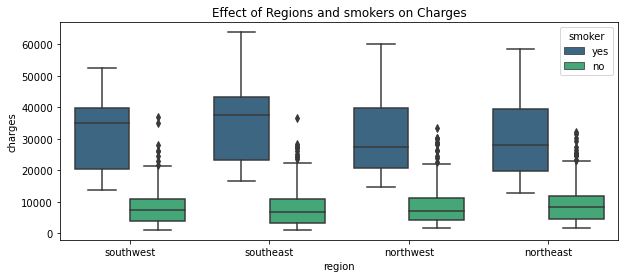

In [23]:
plt.figure(figsize=(10,4))
plt.title('Effect of Regions and smokers on Charges')
sns.boxplot(x='region',y='charges',data=df,hue='smoker',palette='viridis')
plt.show()

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.sex=df.sex.apply(lambda x: 1 if x=='male'else 0)
df.smoker=df.smoker.apply(lambda x: 1 if x=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [27]:
region=pd.get_dummies(df['region'], drop_first = True,prefix='region')
df = pd.concat([df, region], axis = 1)
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [28]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['charges', 'age', 'bmi']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

<ipython-input-29-cfcf0903d9f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/home/pulipati/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
966,0.717391,1,0.237692,2,1,0.364661,1,0,0
522,0.717391,0,0.483051,0,0,0.139579,0,0,0
155,0.565217,1,0.633844,0,0,0.093008,1,0,0
671,0.239130,0,0.408932,0,0,0.045040,0,0,0
1173,0.434783,1,0.357815,2,0,0.085173,1,0,0


In [30]:
y_train = df_train.pop('charges')
X_train = df_train

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
num_vars = ['charges', 'age', 'bmi']
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-32-af89537241ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
/home/pulipati/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [33]:
y_test = df_test.pop('charges')
X_test = df_test

In [35]:
y_pred = lm.predict(X_test)